In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

(240, 10304)
(240,)
(160, 10304)
(160,)


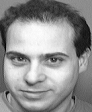

In [2]:
#CNN requires 3D, so we need to have 3D here.
trainX = trainX.reshape(240,112,92,1) #240 total, 112x92 size, 1 
testX = testX.reshape(160,112,92,1) #160 total, 112x92 size, 1
tf.keras.preprocessing.image.array_to_img(trainX[101])

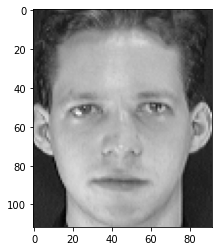

In [3]:
#We need to print the image as well
TrainX = trainX.reshape(240,112,92)
plt.imshow(trainX[0], cmap='gray')

In [4]:
trainX[101]

array([[[113.],
        [112.],
        [111.],
        ...,
        [111.],
        [116.],
        [109.]],

       [[114.],
        [114.],
        [113.],
        ...,
        [111.],
        [111.],
        [112.]],

       [[113.],
        [114.],
        [113.],
        ...,
        [112.],
        [108.],
        [114.]],

       ...,

       [[137.],
        [140.],
        [137.],
        ...,
        [ 89.],
        [ 87.],
        [ 87.]],

       [[139.],
        [136.],
        [142.],
        ...,
        [ 89.],
        [ 88.],
        [ 87.]],

       [[137.],
        [137.],
        [141.],
        ...,
        [ 87.],
        [ 87.],
        [ 89.]]])

In [7]:
#Building the graph 
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((112,92,1),input_shape=(112,92,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, #Number of filers
                                kernel_size=(3,3), #Size of the filter
                                activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(62, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax')) #probability of 20 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
#We need to know the probability of 20 classes...
#Reshape - we take every pic with 112x92x1
#Pass through pics through 3 Conv2d output
#Dense - 20 classes left
#Params - weights and biases we are learning
#Batch norm - like standard scaler


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 112, 92, 1)        0         
                                                                 
 batch_normalization (BatchN  (None, 112, 92, 1)       4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 45, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 45, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 43, 62)        1

In [9]:
#Train the model
model.fit(trainX, trainY,
         validation_data=(testX,testY),
          epochs=20,
          batch_size=16)
#Probability of pictures

Epoch 1/20
15/15 [==============================] - 3s 146ms/step - loss: 3.2052 - accuracy: 0.1125 - val_loss: 2.9894 - val_accuracy: 0.0375
Epoch 2/20
15/15 [==============================] - 2s 135ms/step - loss: 2.5144 - accuracy: 0.3042 - val_loss: 3.2035 - val_accuracy: 0.0500
Epoch 3/20
15/15 [==============================] - 2s 134ms/step - loss: 0.8238 - accuracy: 0.7583 - val_loss: 12.1955 - val_accuracy: 0.0500
Epoch 4/20
15/15 [==============================] - 2s 128ms/step - loss: 0.2551 - accuracy: 0.8833 - val_loss: 18.2414 - val_accuracy: 0.0500
Epoch 5/20
15/15 [==============================] - 2s 136ms/step - loss: 0.1088 - accuracy: 0.9708 - val_loss: 10.7765 - val_accuracy: 0.0500
Epoch 6/20
15/15 [==============================] - 2s 143ms/step - loss: 0.0655 - accuracy: 0.9875 - val_loss: 5.6251 - val_accuracy: 0.1437
Epoch 7/20
15/15 [==============================] - 2s 140ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 4.6900 - val_accuracy: 0.2000
Epo